In [377]:
#importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
import seaborn as sns

In [281]:
#Reading the dataset

country = pd.read_csv('Country-data.csv' , sep = ',' , encoding = 'ISO-8859-1', header = 0)

In [282]:
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [283]:
country.describe(percentiles =[0.25,0.5,0.75,0.95,0.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
95%,116.000000,80.570000,11.570000,81.140000,48290.000000,20.870000,81.400000,5.861000,48610.000000
99%,153.400000,160.480000,13.474000,146.080000,84374.000000,41.478000,82.370000,6.563600,79088.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [284]:
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [285]:
# checkign for null values

country.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [286]:
# Applying scaling on dataset

from sklearn.preprocessing import StandardScaler

country_scale =  country[['child_mort','exports','health' , 'imports' , 'income' , 'inflation' , 'life_expec' , 'total_fer' , 'gdpp']]
standard_scale = StandardScaler()
country_scale = standard_scale.fit_transform(country_scale)
country_scale = pd.DataFrame(country_scale)

In [287]:
country_scale.shape  , country_scale.describe()

((167, 9),
                   0             1             2             3             4  \
 count  1.670000e+02  1.670000e+02  1.670000e+02  1.670000e+02  1.670000e+02   
 mean  -2.659217e-17  2.383323e-16  5.218713e-16  2.871954e-16 -7.512288e-17   
 std    1.003008e+00  1.003008e+00  1.003008e+00  1.003008e+00  1.003008e+00   
 min   -8.871383e-01 -1.500192e+00 -1.827827e+00 -1.939940e+00 -8.603259e-01   
 25%   -7.466190e-01 -6.333367e-01 -6.922106e-01 -6.914785e-01 -7.174558e-01   
 50%   -4.717981e-01 -2.235279e-01 -1.810007e-01 -1.487432e-01 -3.738080e-01   
 75%    5.926666e-01  3.747198e-01  6.515412e-01  4.913530e-01  2.942370e-01   
 max    4.221297e+00  5.813835e+00  4.047436e+00  5.266181e+00  5.611542e+00   
 
                   5             6             7             8  
 count  1.670000e+02  1.670000e+02  1.670000e+02  1.670000e+02  
 mean   8.376533e-17  3.616535e-16  3.124580e-16  2.127373e-17  
 std    1.003008e+00  1.003008e+00  1.003008e+00  1.003008e+00  
 min   

In [288]:
country_scale.head()

,0,1,2,3,4,5,6,7,8
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


In [289]:
country = country.drop(['child_mort','exports','health' , 'imports' , 'income' , 'inflation' , 'life_expec' , 'total_fer' , 'gdpp'], 1)
country_scale.columns = ['child_mort','exports','health' , 'imports' , 'income' , 'inflation' , 'life_expec' , 'total_fer' , 'gdpp']
country = pd.concat([country , country_scale] , axis = 1)
country.head()

#initial dataset after standardizing

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,Albania,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,Algeria,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,Angola,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,Antigua and Barbuda,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


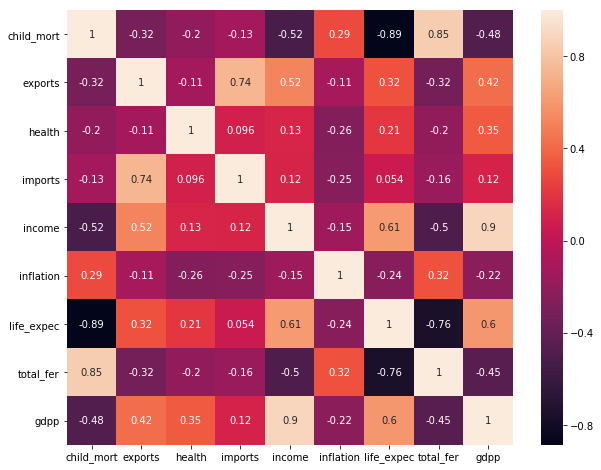

In [290]:
# Correlation

plt.figure(figsize = (10,8))
sns.heatmap(country.corr() , annot = True)

In [291]:
# PCA to tackle multi-collinearity issue ,as shown by diagram above

from sklearn.decomposition import PCA
pca_df = country[['child_mort','exports','health' , 'imports' , 'income' , 'inflation' , 'life_expec' , 'total_fer' , 'gdpp']]
pca = PCA(svd_solver = 'randomized' , random_state = 50)
pca.fit(pca_df)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=50,
  svd_solver='randomized', tol=0.0, whiten=False)

In [292]:
pca.components_

array([[-0.41951945,  0.28389698,  0.15083782,  0.16148244,  0.39844111,
        -0.19317293,  0.42583938, -0.40372896,  0.39264482],
       [ 0.19288394,  0.61316349, -0.24308678,  0.67182064,  0.02253553,
        -0.00840447, -0.22270674,  0.15523311, -0.0460224 ],
       [-0.02954353,  0.14476069, -0.59663237, -0.29992674,  0.3015475 ,
         0.64251951,  0.11391854,  0.01954925,  0.12297749],
       [ 0.37065326,  0.00309102,  0.4618975 , -0.07190746,  0.39215904,
         0.15044176, -0.20379723,  0.37830365,  0.53199457],
       [-0.16896968,  0.05761584,  0.51800037,  0.25537642, -0.2471496 ,
         0.7148691 ,  0.1082198 , -0.13526221, -0.18016662],
       [ 0.20062815, -0.05933283,  0.00727646, -0.03003154,  0.16034699,
         0.06628537, -0.60112652, -0.75068875,  0.01677876],
       [-0.07948854, -0.70730269, -0.24983051,  0.59218953,  0.09556237,
         0.10463252,  0.01848639,  0.02882643,  0.24299776],
       [-0.68274306, -0.01419742,  0.07249683, -0.02894642,  0

In [293]:
# Appending PCA componenst to dataset

colnames = list(pca_df.columns)
components = pd.DataFrame({'PC1': pca.components_[0], 'PC2': pca.components_[1], 'Features': colnames})
components

,Features,PC1,PC2
0,child_mort,-0.419519,0.192884
1,exports,0.283897,0.613163
2,health,0.150838,-0.243087
3,imports,0.161482,0.671821
4,income,0.398441,0.022536
5,inflation,-0.193173,-0.008404
6,life_expec,0.425839,-0.222707
7,total_fer,-0.403729,0.155233
8,gdpp,0.392645,-0.046022


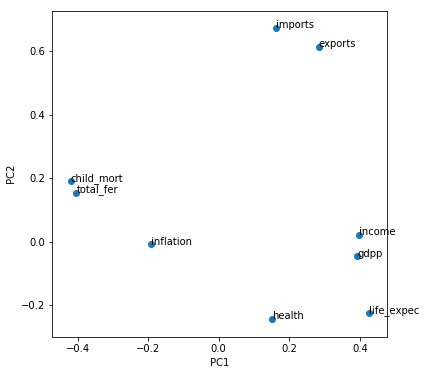

In [294]:
fig = plt.figure(figsize = (6,6))
plt.scatter(components.PC1 , components.PC2)
plt.xlabel(' PC1 ')
plt.ylabel(' PC2 ')
for i , txt in enumerate(components.Features):
    plt.annotate(txt, (components.PC1[i] , components.PC2[i]))
plt.show()

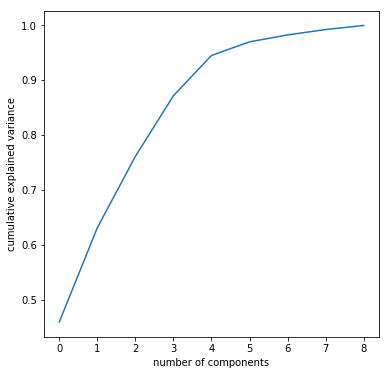

In [295]:
fig = plt.figure(figsize = (6,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

#basd on figure, proceeding with 5 components for further analysis

In [296]:
#Incremental PCA

from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components = 5)

In [297]:
#Final PCA dataset

df_train_pca = pca_final.fit_transform(pca_df)
df_train_pca.shape

(167L, 5L)

In [298]:
# converting to DF

df_train_pca_1 = pd.DataFrame(df_train_pca , columns = ['PC1','PC2','PC3','PC4','PC5'])
df_train_pca_1.head()

,PC1,PC2,PC3,PC4,PC5
0,-2.913010,0.091639,-0.721224,1.001846,-0.146953
1,0.429876,-0.589506,-0.328396,-1.165006,0.153447
2,-0.285269,-0.451602,1.232184,-0.857784,0.191528
3,-2.932723,1.699271,1.524439,0.855563,-0.215234
4,1.033368,0.133696,-0.216746,-0.846631,-0.193265


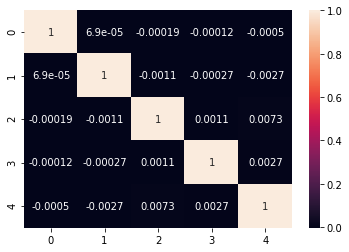

In [299]:
# Creating the correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca_1.transpose())


sns.heatmap(corrmat , annot = True)
plt.show()

In [300]:
# Is -> 0s in diagonal
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr: " , corrmat_nodiag.max(), ", min corr: " , corrmat_nodiag.min())

('max corr: ', 0.007253866250525912, ', min corr: ', -0.0027076543498516918)


# OUTLIER ANALYSIS

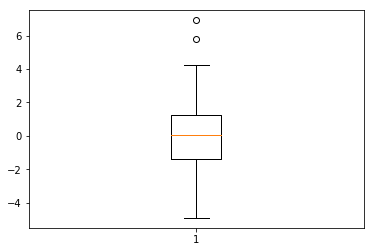

In [301]:
plt.boxplot(df_train_pca_1.PC1)
Q1 = df_train_pca_1.PC1.quantile(0.25)
Q3 =df_train_pca_1.PC1.quantile(0.75)
IQR = Q3 - Q1 
df_train_pca_1 = df_train_pca_1[(df_train_pca_1.PC1 >= Q1 - 1.5*IQR) & (df_train_pca_1.PC1 <=Q3 + 1.5*IQR)]

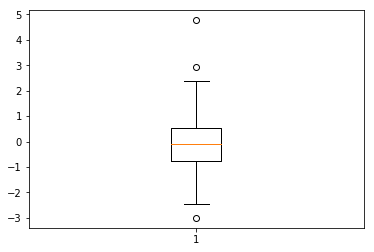

In [302]:
plt.boxplot(df_train_pca_1.PC2)
Q1 = df_train_pca_1.PC2.quantile(0.25)
Q3 =df_train_pca_1.PC2.quantile(0.75)
IQR = Q3 - Q1 
df_train_pca_1 = df_train_pca_1[(df_train_pca_1.PC2 >= Q1 - 1.5*IQR) & (df_train_pca_1.PC2 <=Q3 + 1.5*IQR)]

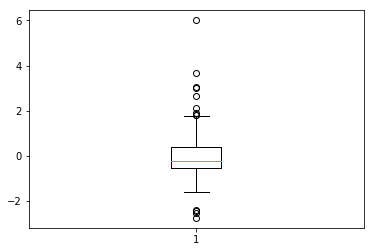

In [303]:
plt.boxplot(df_train_pca_1.PC3)
Q1 = df_train_pca_1.PC3.quantile(0.25)
Q3 =df_train_pca_1.PC3.quantile(0.75)
IQR = Q3 - Q1 
df_train_pca_1 = df_train_pca_1[(df_train_pca_1.PC3 >= Q1 - 1.5*IQR) & (df_train_pca_1.PC3 <=Q3 + 1.5*IQR)]

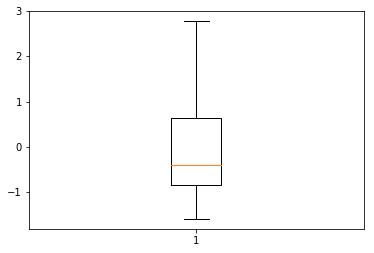

In [304]:
plt.boxplot(df_train_pca_1.PC4)
Q1 = df_train_pca_1.PC4.quantile(0.25)
Q3 =df_train_pca_1.PC4.quantile(0.75)
IQR = Q3 - Q1 
df_train_pca_1 = df_train_pca_1[(df_train_pca_1.PC4 >= Q1 - 1.5*IQR) & (df_train_pca_1.PC4 <=Q3 + 1.5*IQR)]

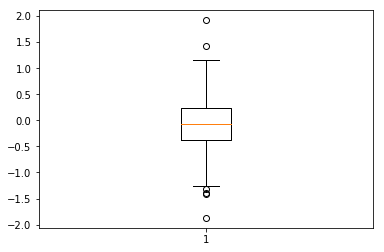

In [305]:
plt.boxplot(df_train_pca_1.PC5)
Q1 = df_train_pca_1.PC5.quantile(0.25)
Q3 =df_train_pca_1.PC5.quantile(0.75)
IQR = Q3 - Q1 
df_train_pca_1 = df_train_pca_1[(df_train_pca_1.PC5 >= Q1 - 1.5*IQR) & (df_train_pca_1.PC5 <=Q3 + 1.5*IQR)]

In [306]:
df_train_pca_1.shape

(143, 5)

# Applying the K Means Algorithm

In [307]:

from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [308]:
hopkins(df_train_pca_1)

0.6674911249577001

# Silhouette Analysis to find the optimal number of K choice.

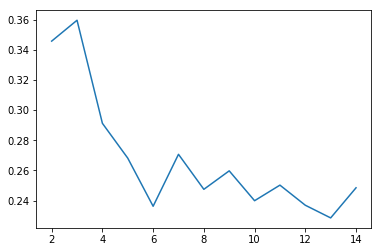

In [309]:
from sklearn.metrics import silhouette_score
sse_ = []
for k in range ( 2 , 15):
    kmeans = KMeans(n_clusters = k).fit(df_train_pca_1)
    sse_.append([k , silhouette_score(df_train_pca_1 , kmeans.labels_)])

#plotting the score
plt.plot(pd.DataFrame(sse_)[0] ,pd.DataFrame(sse_)[1])

# sum of distance squared

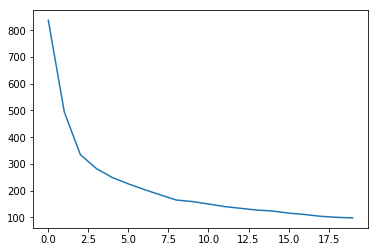

In [310]:
ssd = []
for num_clusters in list(range(1,21)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(df_train_pca_1)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

In [311]:
# Kmeans with K=5

model_clus5 = KMeans(n_clusters = 5 , max_iter = 50)
model_clus5.fit(df_train_pca_1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

# Analysis of Clusters Formed

In [312]:
#df_train_pca_1.index = pd.RangeIndex(df_train_pca_1.index)
df_train_pca_1_km = pd.concat([pd.Series(model_clus5.labels_), df_train_pca_1], axis = 1)
df_train_pca_1_km.columns = ['ClusterID' , 'PC1' , 'PC2' , 'PC3' , 'PC4' , 'PC5']
df_train_pca_1_km.head()

,ClusterID,PC1,PC2,PC3,PC4,PC5
0,4.0,-2.913010,0.091639,-0.721224,1.001846,-0.146953
1,2.0,0.429876,-0.589506,-0.328396,-1.165006,0.153447
2,2.0,-0.285269,-0.451602,1.232184,-0.857784,0.191528
3,1.0,-2.932723,1.699271,1.524439,0.855563,-0.215234
4,3.0,1.033368,0.133696,-0.216746,-0.846631,-0.193265


In [313]:
km_clusters_PC1 = 	pd.DataFrame(df_train_pca_1_km.groupby(["ClusterID"]).PC1.mean())
km_clusters_PC2 = 	pd.DataFrame(df_train_pca_1_km.groupby(["ClusterID"]).PC2.mean())
km_clusters_PC3 = 	pd.DataFrame(df_train_pca_1_km.groupby(["ClusterID"]).PC3.mean())
km_clusters_PC4 = 	pd.DataFrame(df_train_pca_1_km.groupby(["ClusterID"]).PC4.mean())
km_clusters_PC5 = 	pd.DataFrame(df_train_pca_1_km.groupby(["ClusterID"]).PC5.mean())

df = pd.concat([pd.Series([0,1,2,3,4]), km_clusters_PC1, km_clusters_PC2, km_clusters_PC3, km_clusters_PC4 , km_clusters_PC5], axis=1)
df.columns = ['ClusterID' , 'PC1', 'PC2', 'PC3', 'PC4', 'PC5']
df.head()

,ClusterID,PC1,PC2,PC3,PC4,PC5
0,0,-0.431024,0.009335,0.019161,0.280714,-0.186756
1,1,-0.305170,-0.132988,-0.049287,-0.195975,-0.075797
2,2,0.396711,-0.158796,-0.289213,-0.161470,0.090919
3,3,0.196811,-0.229367,0.034814,-0.235959,-0.082451
4,4,-0.603067,-0.146090,-0.232438,-0.144809,-0.102564


In [314]:
# Crating master dataframe

master = pd.concat([country['country'] , pd.DataFrame(df_train_pca)] , axis = 1)
master.columns = ['country' , 'PC1' , 'PC2' , "PC3" , 'PC4' , 'PC5']
master = pd.concat([master , df_train_pca_1_km['ClusterID']] , axis = 1)

colTitles = ['country' , 'ClusterID' , 'PC1' , 'PC2' , 'PC3' , 'PC4' , "PC5"]
master = master.reindex(columns = colTitles)

master.tail()

,country,ClusterID,PC1,PC2,PC3,PC4,PC5
162,Vanuatu,NaN,-0.820764,0.636206,-0.379725,-0.706881,-0.400861
163,Venezuela,NaN,-0.549858,-1.213058,3.074840,-0.108672,2.114754
164,Vietnam,NaN,0.498544,1.393097,-0.253512,-1.085069,1.155943
165,Yemen,NaN,-1.887284,-0.104700,1.107615,0.062605,0.665552
166,Zambia,NaN,-2.863890,0.487409,0.221756,0.818985,-0.266265


In [315]:
# Separating the countries into anothe DFs that are assigned to a cluster

no_outlier_country = master[~np.isnan(master.ClusterID)]
no_outlier_country.shape

(143, 7)

In [316]:
outlier_country = master[np.isnan(master.ClusterID)]
outlier_country.shape , outlier_country.head()

((24, 7),
          country  ClusterID       PC1       PC2       PC3       PC4       PC5
 143     Suriname        NaN  0.171659 -0.094139  0.016502 -0.377215  0.110075
 144       Sweden        NaN  2.818278 -0.915918 -0.100910  1.245719 -0.309599
 145  Switzerland        NaN  4.088628 -0.429357 -0.276187  2.306733 -0.184512
 146   Tajikistan        NaN -1.244383 -0.029398 -0.153745 -0.485155  0.417549
 147     Tanzania        NaN -2.554165 -0.218131 -0.077832  0.467179 -0.444544)

In [317]:
# Creating cluesters for outlier countries dataset

outlier_country_temp = outlier_country[['PC1','PC2','PC3','PC4','PC5']]
hopkins(outlier_country_temp)

0.6388032304575809

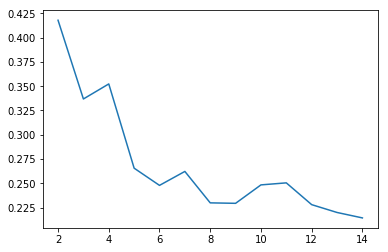

In [318]:
# Silhouette Analysis
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(outlier_country_temp)
    sse_.append([k, silhouette_score(outlier_country_temp, kmeans.labels_)])

# Plotting the silhouette score matrix
plt.plot(pd.DataFrame(sse_)[0],pd.DataFrame(sse_)[1])
plt.show()

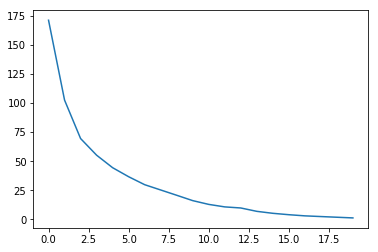

In [319]:
# sum of squared distances
ssd = []
for num_clusters in list(range(1,21)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(outlier_country_temp)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

In [320]:
model_clus3 = KMeans(n_clusters = 3 , max_iter = 50)
model_clus3.fit(outlier_country_temp)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [321]:
outlier_country_temp.index = pd.RangeIndex(len(outlier_country_temp.index))
outlier_country_km = pd.concat([pd.Series(model_clus3.labels_), outlier_country_temp], axis = 1)
outlier_country_km.columns = ['ClusterID' , 'PC1' , 'PC2' , 'PC3' , 'PC4' , 'PC5']
outlier_country_km.head()

,ClusterID,PC1,PC2,PC3,PC4,PC5
0,0,0.171659,-0.094139,0.016502,-0.377215,0.110075
1,1,2.818278,-0.915918,-0.100910,1.245719,-0.309599
2,1,4.088628,-0.429357,-0.276187,2.306733,-0.184512
3,2,-1.244383,-0.029398,-0.153745,-0.485155,0.417549
4,2,-2.554165,-0.218131,-0.077832,0.467179,-0.444544


In [322]:
km_out_PC1 = pd.DataFrame(outlier_country_km.groupby(['ClusterID']).PC1.mean())
km_out_PC2 = pd.DataFrame(outlier_country_km.groupby(['ClusterID']).PC2.mean())
km_out_PC3 = pd.DataFrame(outlier_country_km.groupby(['ClusterID']).PC3.mean())
km_out_PC4 = pd.DataFrame(outlier_country_km.groupby(['ClusterID']).PC4.mean())
km_out_PC5 = pd.DataFrame(outlier_country_km.groupby(['ClusterID']).PC5.mean())

In [323]:
outlier_df = pd.concat([pd.Series([0,1,2]) , km_out_PC1  , km_out_PC2 , km_out_PC3 , km_out_PC4 , km_out_PC5], axis = 1)
outlier_df.columns = ['ClusterID' , 'PC1' , 'PC2' , 'PC3' , 'PC4' , 'PC5']
outlier_df

,ClusterID,PC1,PC2,PC3,PC4,PC5
0,0,0.192567,0.037858,0.394053,-0.693338,0.206677
1,1,2.904152,-1.470308,-0.591381,1.788791,0.025009
2,2,-2.253498,-0.063619,-0.060829,0.553234,0.212153


In [324]:
outlier_new_df = outlier_country_km.merge(outlier_country , how = 'inner' , on = ['PC1' , 'PC2' , 'PC3', 'PC4' , 'PC5'])
outlier_new_df.head()

,ClusterID_x,PC1,PC2,PC3,PC4,PC5,country,ClusterID_y
0,0,0.171659,-0.094139,0.016502,-0.377215,0.110075,Suriname,NaN
1,1,2.818278,-0.915918,-0.100910,1.245719,-0.309599,Sweden,NaN
2,1,4.088628,-0.429357,-0.276187,2.306733,-0.184512,Switzerland,NaN
3,2,-1.244383,-0.029398,-0.153745,-0.485155,0.417549,Tajikistan,NaN
4,2,-2.554165,-0.218131,-0.077832,0.467179,-0.444544,Tanzania,NaN


In [325]:
outlier_new_df.drop(['ClusterID_y'], 1 , inplace = True)
outlier_new_df.rename(columns = {'ClusterID_x' : 'ClusterID'} , inplace = True)
colTitles = ['country' ,'ClusterID', 'PC1','PC2','PC3','PC4','PC5']
outlier_new_df = outlier_new_df.reindex(columns = colTitles)
outlier_new_df.head()

,country,ClusterID,PC1,PC2,PC3,PC4,PC5
0,Suriname,0,0.171659,-0.094139,0.016502,-0.377215,0.110075
1,Sweden,1,2.818278,-0.915918,-0.100910,1.245719,-0.309599
2,Switzerland,1,4.088628,-0.429357,-0.276187,2.306733,-0.184512
3,Tajikistan,2,-1.244383,-0.029398,-0.153745,-0.485155,0.417549
4,Tanzania,2,-2.554165,-0.218131,-0.077832,0.467179,-0.444544


In [326]:
outlier_new_df.tail()

,country,ClusterID,PC1,PC2,PC3,PC4,PC5
19,Vanuatu,0,-0.820764,0.636206,-0.379725,-0.706881,-0.400861
20,Venezuela,0,-0.549858,-1.213058,3.074840,-0.108672,2.114754
21,Vietnam,0,0.498544,1.393097,-0.253512,-1.085069,1.155943
22,Yemen,2,-1.887284,-0.104700,1.107615,0.062605,0.665552
23,Zambia,2,-2.863890,0.487409,0.221756,0.818985,-0.266265


In [327]:
nonoutliercountry_centers = np.array(model_clus5.cluster_centers_)

print(pd.DataFrame(nonoutliercountry_centers).shape)

# Finding the centroid of each cluster formed for  non_outlier dataset

(5, 5)


In [328]:
outliercountry_centers = np.array(model_clus3.cluster_centers_)

print(pd.DataFrame(outliercountry_centers).shape)

# Finding the centroid of each cluster formed for  non_outlier dataset

(3, 5)


In [329]:
# distance between cluster of each centroid between outlier and no outlier dtaset

import scipy as sp
distance = pd.DataFrame(sp.spatial.distance.cdist(outliercountry_centers, nonoutliercountry_centers , metric = 'euclidean'))
distance

,0,1,2,3,4
0,3.267124,2.072899,0.915895,1.084223,3.956001
1,0.934935,5.283806,4.227063,3.663651,6.351530
2,4.991646,1.032856,2.574557,3.497776,1.414692


In [330]:
# the idea behind above step is to categorize countired in outlier dataset into clusters defined for no outlier dataset

# thereby calculating distance between each centroid between datasets, we can manually characterize point based on minimum distance

cluster1 = outlier_new_df.loc[outlier_new_df['ClusterID'] == 0]
cluster2 = outlier_new_df.loc[outlier_new_df['ClusterID'] == 1]
cluster3 = outlier_new_df.loc[outlier_new_df['ClusterID'] == 2]

cluster1.shape , cluster2.shape ,cluster3.shape
cluster3

,country,ClusterID,PC1,PC2,PC3,PC4,PC5
3,Tajikistan,2,-1.244383,-0.029398,-0.153745,-0.485155,0.417549
4,Tanzania,2,-2.554165,-0.218131,-0.077832,0.467179,-0.444544
6,Timor-Leste,2,-2.371868,-1.176237,0.393151,1.159463,1.418802
7,Togo,2,-1.998016,0.951651,-1.217561,0.555499,-0.395492
12,Uganda,2,-2.854880,-0.355928,-0.699184,1.294065,0.089473
22,Yemen,2,-1.887284,-0.104700,1.107615,0.062605,0.665552
23,Zambia,2,-2.863890,0.487409,0.221756,0.818985,-0.266265


In [331]:
# reassigning points based on distance
cluster1['ClusterID'] = cluster1['ClusterID'].replace(0,3)
cluster2['ClusterID'] = cluster2['ClusterID'].replace(1,4)
cluster3['ClusterID'] = cluster3['ClusterID'].replace(2,2)

C:\Users\Dell\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Dell\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Dell\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

In [332]:
# creating a final dataset

result_data = no_outlier_country
result_data = result_data.append(cluster1)
result_data = result_data.append(cluster2)
result_data = result_data.append(cluster3)
result_data.shape , result_data.tail(), result_data.head()

((167, 7),
         country  ClusterID       PC1       PC2       PC3       PC4       PC5
 6   Timor-Leste        2.0 -2.371868 -1.176237  0.393151  1.159463  1.418802
 7          Togo        2.0 -1.998016  0.951651 -1.217561  0.555499 -0.395492
 12       Uganda        2.0 -2.854880 -0.355928 -0.699184  1.294065  0.089473
 22        Yemen        2.0 -1.887284 -0.104700  1.107615  0.062605  0.665552
 23       Zambia        2.0 -2.863890  0.487409  0.221756  0.818985 -0.266265,
                country  ClusterID       PC1       PC2       PC3       PC4  \
 0          Afghanistan        4.0 -2.913010  0.091639 -0.721224  1.001846   
 1              Albania        2.0  0.429876 -0.589506 -0.328396 -1.165006   
 2              Algeria        2.0 -0.285269 -0.451602  1.232184 -0.857784   
 3               Angola        1.0 -2.932723  1.699271  1.524439  0.855563   
 4  Antigua and Barbuda        3.0  1.033368  0.133696 -0.216746 -0.846631   
 
         PC5  
 0 -0.146953  
 1  0.153447  
 2  0

In [333]:
# Mean of principal components for the final dataset.
km_result_data_PC1 = 	pd.DataFrame(result_data.groupby(["ClusterID"]).PC1.mean())
km_result_data_PC2 = 	pd.DataFrame(result_data.groupby(["ClusterID"]).PC2.mean())
km_result_data_PC3 = 	pd.DataFrame(result_data.groupby(["ClusterID"]).PC3.mean())
km_result_data_PC4 = 	pd.DataFrame(result_data.groupby(["ClusterID"]).PC4.mean())
km_result_data_PC5 = 	pd.DataFrame(result_data.groupby(["ClusterID"]).PC5.mean())

df_finaldata = pd.concat([pd.Series([0,1,2,3,4]),km_result_data_PC1, km_result_data_PC2, km_result_data_PC3, km_result_data_PC4 , km_result_data_PC5], axis=1)
df_finaldata.columns = ['ClusterID' , 'PC1', 'PC2', 'PC3', 'PC4', 'PC5']
df_finaldata

,ClusterID,PC1,PC2,PC3,PC4,PC5
0,0,-0.431024,0.009335,0.019161,0.280714,-0.186756
1,1,-0.079687,0.119514,-0.024285,-0.185382,-0.072133
2,2,-0.117871,-0.148933,-0.085924,0.008843,0.014226
3,3,0.297965,0.092254,0.074355,-0.214666,0.016388
4,4,0.048965,-0.084222,0.003524,0.467514,0.217224


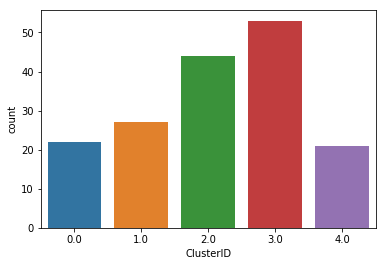

In [334]:
#Clustering Visualization

sns.countplot(result_data.ClusterID)
plt.show()

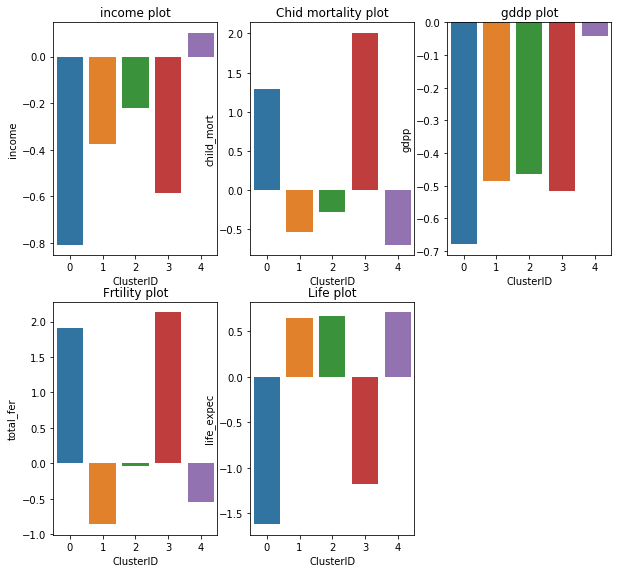

In [335]:
#plotting cluster based on PC1

plt.figure(figsize = (10,30))

plt.subplot(631)
plt.title('income plot')
sns.barplot(y = country.income , x = df_finaldata.ClusterID)

plt.subplot(632)
plt.title('Chid mortality plot')
sns.barplot(y = country.child_mort , x = df_finaldata.ClusterID)

plt.subplot(633)
plt.title('gddp plot')
sns.barplot(y = country.gdpp , x = df_finaldata.ClusterID)

plt.subplot(634)
plt.title('Frtility plot')
sns.barplot(y = country.total_fer , x = df_finaldata.ClusterID)

plt.subplot(635)
plt.title('Life plot')
sns.barplot(y = country.life_expec , x = df_finaldata.ClusterID)

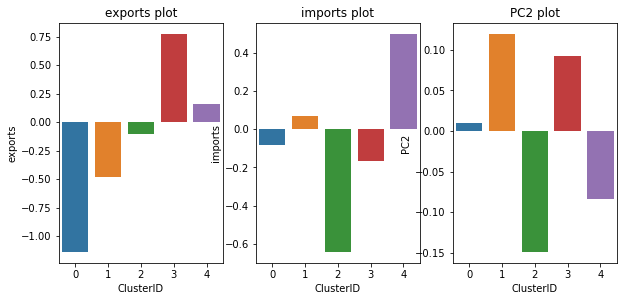

In [336]:
# Plotting the clusters against the original socio-economic factors and the principal component PC2.
plt.figure(figsize=(10,15))

plt.subplot(3,3,1)
plt.title("exports plot")
sns.barplot(y=country.exports, x=df_finaldata.ClusterID)

plt.subplot(3,3,2)
plt.title("imports plot")
sns.barplot(y=country.imports, x=df_finaldata.ClusterID)

plt.subplot(3,3,3)
plt.title("PC2 plot")
sns.barplot(x=df_finaldata.ClusterID, y=df_finaldata.PC2)
plt.show()

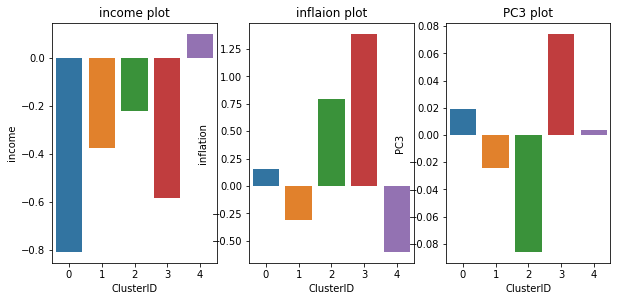

In [337]:
# Plotting the clusters against the original socio-economic factors and the principal component PC3.
plt.figure(figsize=(10,15))

plt.subplot(3,3,1)
plt.title("income plot")
sns.barplot(y=country.income, x=df_finaldata.ClusterID)

plt.subplot(3,3,2)
plt.title("inflaion plot")
sns.barplot(y=country.inflation, x=df_finaldata.ClusterID)

plt.subplot(3,3,3)
plt.title("PC3 plot")
sns.barplot(x=df_finaldata.ClusterID, y=df_finaldata.PC3)
plt.show()

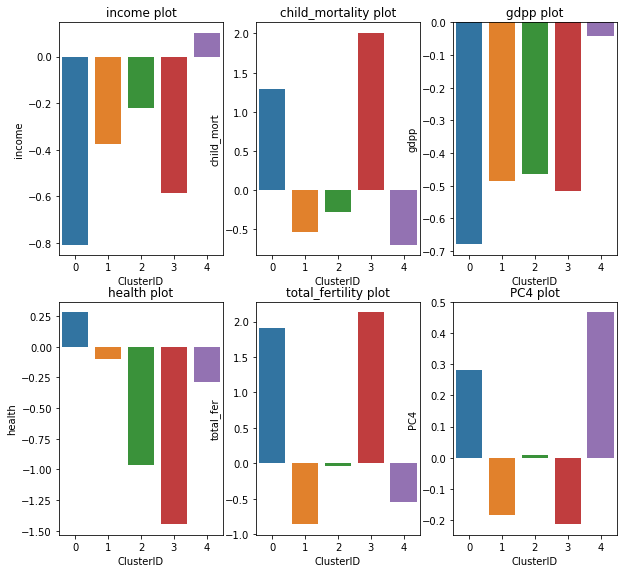

In [338]:
# Plotting the clusters against the original socio-economic factors and the principal component PC4.
plt.figure(figsize=(10,30))

plt.subplot(6,3,1)
plt.title("income plot")
sns.barplot(y=country.income, x=df_finaldata.ClusterID)

plt.subplot(6,3,2)
plt.title("child_mortality plot")
sns.barplot(y=country.child_mort, x=df_finaldata.ClusterID)

plt.subplot(6,3,3)
plt.title("gdpp plot")
sns.barplot(y=country.gdpp, x=df_finaldata.ClusterID)

plt.subplot(6,3,4)
plt.title("health plot")
sns.barplot(y=country.health, x=df_finaldata.ClusterID)

plt.subplot(6,3,5)
plt.title("total_fertility plot")
sns.barplot(y=country.total_fer, x=df_finaldata.ClusterID)

plt.subplot(6,3,6)
plt.title("PC4 plot")
sns.barplot(x=df_finaldata.ClusterID, y=df_finaldata.PC4)
plt.show()

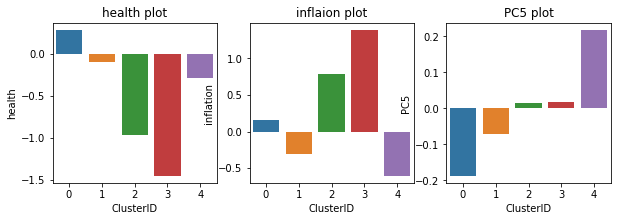

In [339]:
# Plotting the clusters against the original socio-economic factors and the principal component PC5.
plt.figure(figsize=(10,10))

plt.subplot(3,3,1)
plt.title("health plot")
sns.barplot(y=country.health, x=df_finaldata.ClusterID)

plt.subplot(3,3,2)
plt.title("inflaion plot")
sns.barplot(y=country.inflation, x=df_finaldata.ClusterID)

plt.subplot(3,3,3)
plt.title("PC5 plot")
sns.barplot(x=df.ClusterID, y=df_finaldata.PC5)
plt.show()

In [340]:
# converting to DF

df_train_pca_2 = pd.DataFrame(df_train_pca)
df_train_pca_2.columns = ['PC1','PC2', 'PC3', 'PC4', 'PC5']
df_train_pca_2.head() , df_train_pca_1.shape

(        PC1       PC2       PC3       PC4       PC5
 0 -2.913010  0.091639 -0.721224  1.001846 -0.146953
 1  0.429876 -0.589506 -0.328396 -1.165006  0.153447
 2 -0.285269 -0.451602  1.232184 -0.857784  0.191528
 3 -2.932723  1.699271  1.524439  0.855563 -0.215234
 4  1.033368  0.133696 -0.216746 -0.846631 -0.193265, (143, 5))

# heirarchial clustering

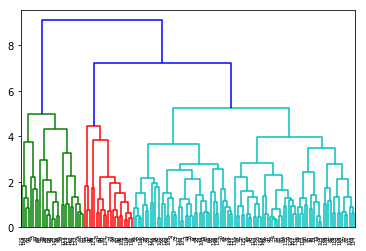

In [350]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

merging = linkage(df_train_pca_1 , method = 'complete' , metric = 'euclidean')
dendrogram(merging)
plt.show()

In [351]:
cluster_cut = pd.Series(cut_tree(merging , n_clusters = 5).reshape(-1,))
clust_components = pd.concat([cluster_cut, df_train_pca_1] , axis = 1)
clust_components.columns = ['ClusterID','PC1','PC2','PC3','PC4','PC5']
clust_components.shape , clust_components.columns , cluster_cut.shape

((163, 6),
 Index([u'ClusterID', u'PC1', u'PC2', u'PC3', u'PC4', u'PC5'], dtype='object'),
 (143L,))

In [352]:
master_df = pd.concat([country['country'] , pd.DataFrame(df_train_pca)] , axis = 1)
master_df.columns = ['country' , 'PC1' , 'PC2' , "PC3" , 'PC4' , 'PC5']
master_df = pd.concat([master_df , clust_components['ClusterID']] , axis = 1)

colTitles = ['country' , 'ClusterID' , 'PC1' , 'PC2' , 'PC3' , 'PC4' , "PC5"]
master_df = master_df.reindex(columns = colTitles)

master_df.shape

(167, 7)

In [357]:
# creatig subset of countries with  cluster. or  non outlier segregated countires
no_clust_count = master_df[~np.isnan(master.ClusterID)]
outlier_count = master_df[np.isnan(master.ClusterID)]
outlier_count.shape  , no_clust_count.shape

((24, 7), (143, 7))

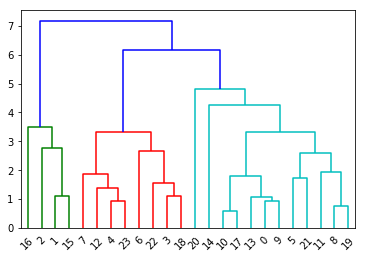

In [358]:
outlier_temp = outlier_count[['PC1','PC2','PC3','PC4','PC5']]

merging = linkage(outlier_temp , method = 'complete' , metric = 'euclidean')
dendrogram(merging)
plt.show()

In [359]:
outlier_temp.index = pd.RangeIndex(len(outlier_temp.index))
cluster_cut_1 = pd.Series(cut_tree(merging , n_clusters = 3).reshape(-1))
clust_components_1 = pd.concat([cluster_cut_1, outlier_temp] , axis = 1)
clust_components_1.columns = ['ClusterID','PC1','PC2','PC3','PC4','PC5']
clust_components_1

,ClusterID,PC1,PC2,PC3,PC4,PC5
0,0,0.171659,-0.094139,0.016502,-0.377215,0.110075
1,1,2.818278,-0.915918,-0.100910,1.245719,-0.309599
2,1,4.088628,-0.429357,-0.276187,2.306733,-0.184512
3,2,-1.244383,-0.029398,-0.153745,-0.485155,0.417549
4,2,-2.554165,-0.218131,-0.077832,0.467179,-0.444544
5,0,0.925802,0.828022,0.352393,-1.591565,-0.194163
6,2,-2.371868,-1.176237,0.393151,1.159463,1.418802
7,2,-1.998016,0.951651,-1.217561,0.555499,-0.395492
8,0,-0.755124,-0.093593,-0.410554,-0.854004,-0.266806
9,0,0.601939,0.171037,-0.234404,-1.118932,0.140056


In [363]:
# Merging outlier country names and ClusterIDs
outlier_country_new = outlier_count.merge(clust_components_1, how='inner', on=['PC1','PC2','PC3','PC4','PC5'])
outlier_country_new = outlier_country_new.drop(['ClusterID_x'],1)
outlier_country_new.rename(columns={'ClusterID_y':'ClusterID'}, inplace=True)
colTitles=['country','ClusterID','PC1','PC2','PC3','PC4','PC5']
outlier_country_new=outlier_country_new.reindex(columns=colTitles)
outlier_country_new.head()

,country,ClusterID,PC1,PC2,PC3,PC4,PC5
0,Suriname,0,0.171659,-0.094139,0.016502,-0.377215,0.110075
1,Sweden,1,2.818278,-0.915918,-0.100910,1.245719,-0.309599
2,Switzerland,1,4.088628,-0.429357,-0.276187,2.306733,-0.184512
3,Tajikistan,2,-1.244383,-0.029398,-0.153745,-0.485155,0.417549
4,Tanzania,2,-2.554165,-0.218131,-0.077832,0.467179,-0.444544


In [364]:
clust_components_PC1 = 	pd.DataFrame(clust_components.groupby(["ClusterID"]).PC1.mean())
clust_components_PC2 = 	pd.DataFrame(clust_components.groupby(["ClusterID"]).PC2.mean())
clust_components_PC3 = 	pd.DataFrame(clust_components.groupby(["ClusterID"]).PC3.mean())
clust_components_PC4 = 	pd.DataFrame(clust_components.groupby(["ClusterID"]).PC4.mean())
clust_components_PC5 = 	pd.DataFrame(clust_components.groupby(["ClusterID"]).PC5.mean())

df_clust_components = pd.concat([pd.Series([0,1,2,3,4]),clust_components_PC1, clust_components_PC2, clust_components_PC3, 
                                 clust_components_PC4 , clust_components_PC5], axis=1)
df_clust_components.columns = ['ClusterID' , 'PC1', 'PC2', 'PC3', 'PC4', 'PC5']
df_clust_components

,ClusterID,PC1,PC2,PC3,PC4,PC5
0,0,-0.430775,-0.110107,-0.237543,-0.257777,0.014911
1,1,0.128818,-0.079037,-0.177136,-0.181736,-0.002983
2,2,-1.068065,-0.141275,0.279738,-0.231192,-0.237524
3,3,0.307317,-0.305653,-0.075247,-0.191129,-0.029600
4,4,-0.406095,0.044411,-0.045991,0.348018,-0.180408


In [366]:
outlier_components_PC1 = 	pd.DataFrame(clust_components_1.groupby(["ClusterID"]).PC1.mean())
outlier_components_PC2 = 	pd.DataFrame(clust_components_1.groupby(["ClusterID"]).PC2.mean())
outlier_components_PC3 = 	pd.DataFrame(clust_components_1.groupby(["ClusterID"]).PC3.mean())
outlier_components_PC4 = 	pd.DataFrame(clust_components_1.groupby(["ClusterID"]).PC4.mean())
outlier_components_PC5 = 	pd.DataFrame(clust_components_1.groupby(["ClusterID"]).PC5.mean())

df_outlier_components = pd.concat([pd.Series([0,1,2]),outlier_components_PC1, outlier_components_PC2, outlier_components_PC3, 
                                 outlier_components_PC4 , outlier_components_PC5], axis=1)
df_outlier_components.columns = ['ClusterID' , 'PC1', 'PC2', 'PC3', 'PC4', 'PC5']
df_outlier_components

,ClusterID,PC1,PC2,PC3,PC4,PC5
0,0,0.279716,0.095107,0.375435,-0.690901,0.182826
1,1,2.904152,-1.470308,-0.591381,1.788791,0.025009
2,2,-2.078464,-0.136807,0.023959,0.393758,0.247246


In [367]:
# Finding the distance of centroid of each cluster between the outlied and non-outlied countries.
import scipy

print(pd.DataFrame(scipy.spatial.distance.cdist(df_clust_components,df_outlier_components, metric='euclidean')))

          0         1         2
0  1.066980  4.276170  2.694893
1  1.285381  3.700469  2.511907
2  2.503912  4.842824  1.308400
3  3.107955  4.036017  2.673768
4  4.226322  4.966647  2.649440


In [369]:
# Now that we know which outlier country cluster's centroid is nearest to the non-outlied country's cluster.
# Assigning that non-outlied country's cluster id to the outlied country's cluster id.
Cluster1= outlier_country_new.loc[outlier_country_new['ClusterID']==0]
Cluster2= outlier_country_new.loc[outlier_country_new['ClusterID']==1]
Cluster3= outlier_country_new.loc[outlier_country_new['ClusterID']==2]

Cluster1['ClusterID'] = Cluster1['ClusterID'].map({0:1})
#Cluster2['ClusterID'] = Cluster2['ClusterID'].map({1:4})
#Cluster3['ClusterID'] = Cluster3['ClusterID'].map({2:1})

# finally merging the datasets to get a final dataset.
final_data_1 = no_clust_count
final_data_1=final_data.append(Cluster1)
final_data_1=final_data.append(Cluster2)
final_data_1=final_data.append(Cluster3)


print(final_data_1.shape)

(167, 7)


C:\Users\Dell\Anaconda2\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


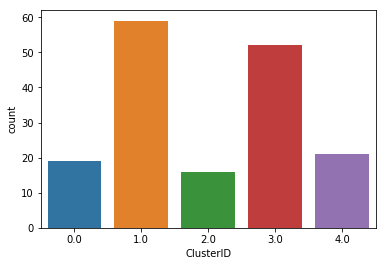

In [371]:
#Clustering Visualization

sns.countplot(final_data_1.ClusterID)
plt.show()

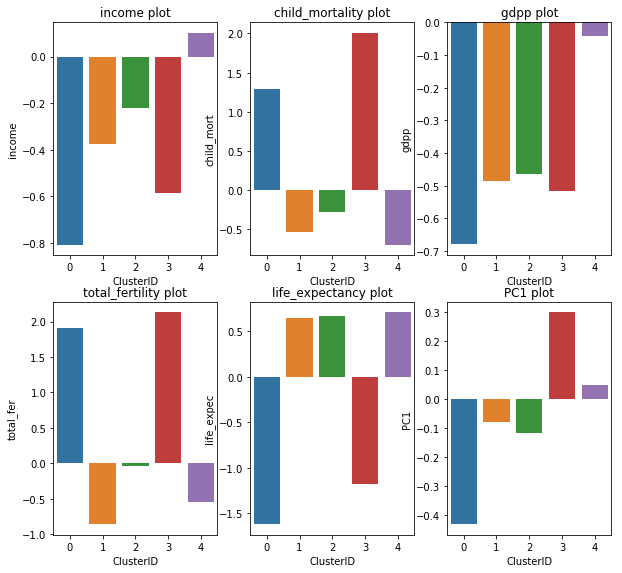

In [373]:
# Plotting the clusters against the original socio-economic factors and the principal component PC1.
plt.figure(figsize=(10,30))

plt.subplot(631)
plt.title("income plot")
sns.barplot(y=country.income, x=final_data_1.ClusterID)

plt.subplot(632)
plt.title("child_mortality plot")
sns.barplot(y=country.child_mort, x=final_data_1.ClusterID)

plt.subplot(633)
plt.title("gdpp plot")
sns.barplot(y=country.gdpp, x=final_data_1.ClusterID)

plt.subplot(634)
plt.title("total_fertility plot")
sns.barplot(y=country.total_fer, x=final_data_1.ClusterID)

plt.subplot(635)
plt.title("life_expectancy plot")
sns.barplot(y=country.life_expec, x=final_data_1.ClusterID)

plt.subplot(636)
plt.title("PC1 plot")
sns.barplot(x=df_finaldata.ClusterID, y=final_data_1.PC1)

plt.show()

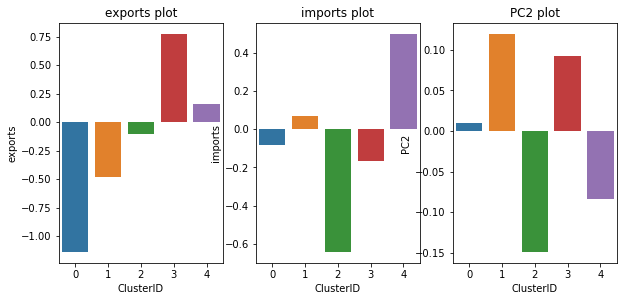

In [372]:
# Plotting the clusters against the original socio-economic factors and the principal component PC2.
plt.figure(figsize=(10,15))

plt.subplot(3,3,1)
plt.title("exports plot")
sns.barplot(y=country.exports, x=final_data_1.ClusterID)

plt.subplot(3,3,2)
plt.title("imports plot")
sns.barplot(y=country.imports, x=final_data_1.ClusterID)

plt.subplot(3,3,3)
plt.title("PC2 plot")
sns.barplot(x=df_finaldata.ClusterID, y=final_data_1.PC2)
plt.show()

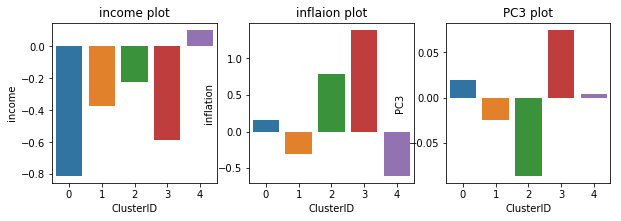

In [374]:
# Plotting the clusters against the original socio-economic factors and the principal component PC3.
plt.figure(figsize=(10,10))

plt.subplot(3,3,1)
plt.title("income plot")
sns.barplot(y=country.income, x=final_data_1.ClusterID)

plt.subplot(3,3,2)
plt.title("inflaion plot")
sns.barplot(y=country.inflation, x=final_data_1.ClusterID)

plt.subplot(3,3,3)
plt.title("PC3 plot")
sns.barplot(x=df_finaldata.ClusterID, y=final_data_1.PC3)
plt.show()

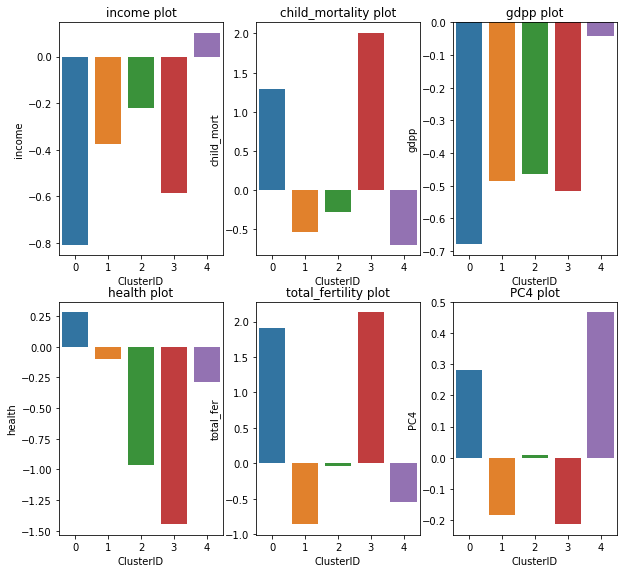

In [375]:
# Plotting the clusters against the original socio-economic factors and the principal component PC4.
plt.figure(figsize=(10,30))

plt.subplot(6,3,1)
plt.title("income plot")
sns.barplot(y=country.income, x=final_data_1.ClusterID)

plt.subplot(6,3,2)
plt.title("child_mortality plot")
sns.barplot(y=country.child_mort, x=final_data_1.ClusterID)

plt.subplot(6,3,3)
plt.title("gdpp plot")
sns.barplot(y=country.gdpp, x=final_data_1.ClusterID)

plt.subplot(6,3,4)
plt.title("health plot")
sns.barplot(y=country.health, x=final_data_1.ClusterID)

plt.subplot(6,3,5)
plt.title("total_fertility plot")
sns.barplot(y=country.total_fer, x=final_data_1.ClusterID)

plt.subplot(6,3,6)
plt.title("PC4 plot")
sns.barplot(x=df_finaldata.ClusterID, y=final_data_1.PC4)
plt.show()